In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

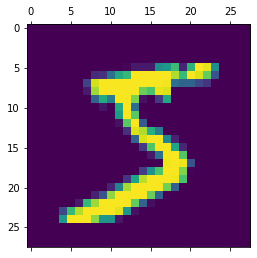

In [7]:
plt.matshow(X_train[0])

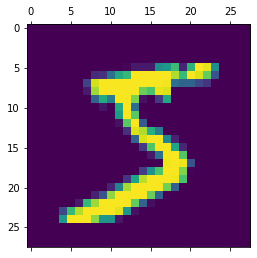

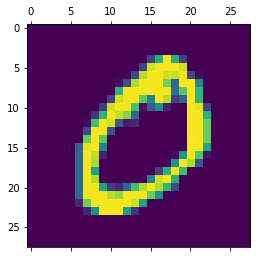

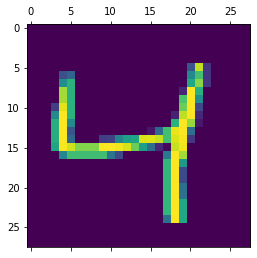

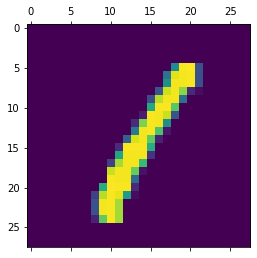

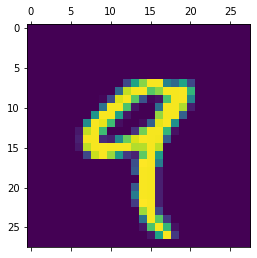

In [8]:
for i in range(5):
    plt.matshow(X_train[i])

In [9]:
y_train[0]

5

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4688 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9258


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.9262


[0.2665889263153076, 0.9261999726295471]

In [17]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


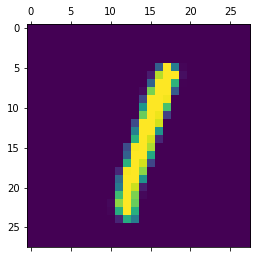

In [18]:
plt.matshow(X_test[5])

In [19]:
y_predicted[5]

array([7.0077629e-05, 9.9802011e-01, 4.5554003e-01, 4.2375562e-01,
       8.1744948e-03, 1.8631190e-02, 8.8616461e-03, 5.7287836e-01,
       4.5600429e-01, 1.1491288e-01], dtype=float32)

In [20]:
max(y_predicted[5])

0.9980201

In [21]:
np.argmax(y_predicted[5])

1

In [22]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [24]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    1,    0,    5,    4,    1,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   11,  926,   17,    8,    3,   12,   11,   34,    3],
       [   2,    0,   18,  925,    0,   22,    3,   13,   20,    7],
       [   2,    1,    7,    2,  924,    0,    7,    4,   10,   25],
       [  12,    2,    5,   33,   10,  774,   14,    6,   29,    7],
       [  16,    3,    7,    1,    8,   14,  907,    1,    1,    0],
       [   2,    6,   21,    6,    9,    0,    0,  958,    2,   24],
       [   9,    8,    8,   25,   10,   24,    9,   14,  861,    6],
       [  11,    7,    1,   11,   37,    6,    0,   28,    5,  903]])>

Text(51.0, 0.5, 'Truth_Value')

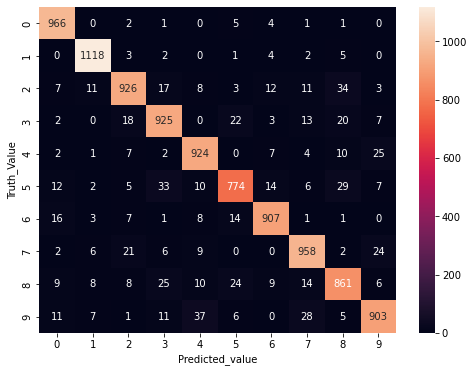

In [25]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted_value")
plt.ylabel("Truth_Value")

In [33]:
model=keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,),activation='relu'),
     keras.layers.Dense(350,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2241 - accuracy: 0.9317
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0993 - accuracy: 0.9711
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0745 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0606 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0475 - accuracy: 0.9858


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0831 - accuracy: 0.9797


[0.0830652117729187, 0.9797000288963318]

In [35]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 4ms/step


In [36]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(51.0, 0.5, 'Truth_Value')

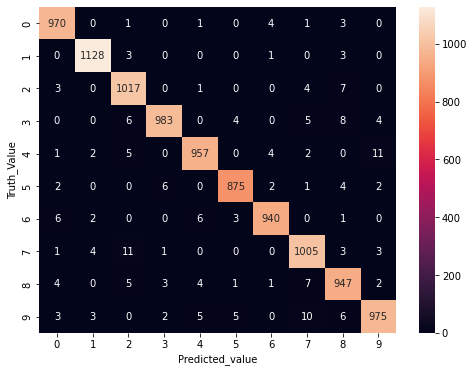

In [37]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted_value")
plt.ylabel("Truth_Value")

In [38]:
model.save("./saved_model")

INFO:tensorflow:Assets written to: ./saved_model\assets


# POST Training Quantaization

In [44]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model=converter.convert()

In [45]:
len(tflite_model)#this is return bytes

2658140

In [42]:
converter=tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()

In [46]:
len(tflite_quant_model)

672360

In [47]:
with open("tflite_model.tflite","wb") as f:
    f.write(tflite_model)

with open("tflite_quant_model","wb") as f1:
    f1.write(tflite_quant_model)
#this technique is work might be ok but accuracy is shuffered

# Quantaization Aware Training

In [53]:
import tensorflow_model_optimization as tfmot

quntize_model=tfmot.quantization.keras.quantize_model

q_aware_model=quntize_model(model)

q_aware_model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 784)              3         
 er)                                                             
                                                                 
 quant_dense_13 (QuantizeWra  (None, 500)              392505    
 pperV2)                                                         
                                                                 
 quant_dense_14 (QuantizeWra  (None, 350)              175355    
 pperV2)                                                         
                                                                 
 quant_dense_15 (QuantizeWra  (None, 200)              70205     
 pperV2)                                                         
                                                                 
 quant_dense_16 (QuantizeWra  (None, 100)             

In [54]:
q_aware_model.fit(X_train_flattened,y_train,epochs=1)

1875/1875 [==============================] - 37s 19ms/step - loss: 0.0465 - accuracy: 0.9865


In [55]:
q_aware_model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1170 - accuracy: 0.9730


[0.1169985979795456, 0.9729999899864197]

In [56]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_aware_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Sai\AppData\Local\Temp\tmpkk_ms39d\assets


INFO:tensorflow:Assets written to: C:\Users\Sai\AppData\Local\Temp\tmpkk_ms39d\assets
C:\Users\Sai\anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [57]:
#here accuracy is littel better from previous quantized model
with open("tflite_aware_model.tflite","wb") as f:
    f.write(tflite_aware_model)